## Projeto de Data Mining - Análise de Investimentos em ações e fundos do mercado Brasileiro

In [1]:
## Importar bibliotecas necessárias para a realização do projeto

import pandas as pd
import numpy as np
import pandas_profiling as pdpf
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt


C:\Users\elysi\AppData\Local\Temp\ipykernel_17512\1522556581.py:5: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pdpf


In [2]:
# ParserError: Error tokenizing data. C error: Expected 5 fields in line 3, saw 7
#df=pd.read_csv('projeto_dm.csv')

In [3]:
# Abrir o arquivo no formato excel, devido a erro no formato csv
df=pd.read_excel('projeto_dm_maio.xlsx')

In [4]:
#Verificar as dimensões do data set
df.shape

(897, 14)

In [5]:
#Verificar o cabeçalho do data set
df.head(10)

,CÓDIGO,TIPO,SETOR,COTAÇÃO ATUAL,PREÇO MÍNIMO,PREÇO MÁXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO,INVESTIR
0,AALR3,AÇÃO,Saúde,22.66,19.38,22.75,0.0000,803918465,2.73,-,9.819170e+08,187300000,-219240000,NÃO
1,ABCB4,AÇÃO,Financeiro e Outros,16.63,14.47,22.29,0.0649,124751399,0.72,0.1336,5.205386e+09,3559270000,800230000,SIM
2,ABEV3,AÇÃO,Consumo não Cíclico,14.4,12.47,16.03,0.0520,47099952297,2.77,0.1474,8.332783e+10,20642150000,1489129,NÃO
3,ADHM3,AÇÃO,Saúde,1.56,1.56,1.56,0.0000,-,-1.29,-,-1.977600e+07,160000,-4940000,NÃO
4,AERI3,AÇÃO,Bens Industriais,1.6,0.88,5.19,0.0000,603962032,1.17,-,8.848680e+08,-13300000,-108740000,SIM
5,AESB3,AÇÃO,Utilidade Pública,12.4,9.05,11.20,0.0105,1909473332,1.11,-,5.573795e+09,-1024850000,-,SIM
6,AFLT3,AÇÃO,Utilidade Pública,8.8,8.65,10.50,0.0262,711628,2.18,0.2453,2.607320e+08,20700000,37490000,NÃO
7,AGRO3,AÇÃO,Consumo não Cíclico,22.65,20.04,31.53,0.1300,12017837,1.24,0.3906,2.051176e+09,205180000,520100000,NÃO
8,AGXY3,AÇÃO,Consumo não Cíclico,6.69,6.66,10.65,0.0220,30030206,0.87,-,1.501466e+09,-144110000,0,SIM
9,AHEB3,AÇÃO,Consumo Cíclico,20,17.00,30.00,0.0000,2000,-30.06,-,-5.685000e+06,24860000,64730000,NÃO


In [6]:
#Verificar as últimas instâncias do data set
df.tail(10)

,CÓDIGO,TIPO,SETOR,COTAÇÃO ATUAL,PREÇO MÍNIMO,PREÇO MÁXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO,INVESTIR
887,IRDM11,FUNDO,Títulos e Val. Mob.,85.62,77.69,108.15,0.1602,741287903,0.87,-0.0602,3.261837e+09,17689322828,0,NÃO
888,IRIM11,FUNDO,Híbrido,88.04,84.00,110.55,0.1611,6659091,0.91,-,1.821963e+08,869205343,0,SIM
889,ITIP11,FUNDO,Títulos e Val. Mob.,73.25,70.99,87.00,0.1454,12014326,0.98,-,5.586329e+07,87606815,0,SIM
890,ITIT11,FUNDO,Títulos e Val. Mob.,72.3,68.58,82.59,0.0963,11853071,0.97,-,6.676037e+07,1935914,0,SIM
891,JFLL11,FUNDO,Residencial,66.93,56.15,79.30,0.1122,4719637,0.66,-,1.518730e+08,372890539,0,SIM
892,JGPX11,FUNDO,Híbrido,96.76,94.21,98.90,0.1493,12728271,1,-,8.171437e+07,291330211,0,SIM
893,JPPA11,FUNDO,Títulos e Val. Mob.,93.97,90.47,109.30,0.2072,35115949,0.95,-0.0062,8.896746e+07,70237432,0,NÃO
894,JRDM11,FUNDO,Shoppings,79.1,75.25,87.93,0.0932,2534089,0.89,0.0312,2.233239e+08,178760205,0,NÃO
895,JSAF11,FUNDO,Títulos e Val. Mob.,83.9,76.14,94.75,0.1324,40772397,0.93,-,1.419765e+08,1838064816,0,SIM
896,JSRE11,FUNDO,Híbrido,71.01,61.00,88.40,0.0882,204680657,0.59,-0.1289,2.340464e+09,580274082,0,NÃO


In [7]:
# Overview das variáveis
print(df.columns)

Index(['CÓDIGO', 'TIPO', 'SETOR', 'COTAÇÃO ATUAL', 'PREÇO MÍNIMO',
       'PREÇO MÁXIMO', 'DIVIDEND YIELD', 'LIQUIDEZ DIÁRIA', 'P/VP',
       'CAGR LUCRO', 'PATRIMÔNIO LÍQUIDO', 'CAIXA', 'LUCRO', 'INVESTIR'],
      dtype='object')


In [8]:
#Exibir o Data Frame completo
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#display(df)

In [9]:
#Verificar os tipos dos dados para buscar e corrigir inconsistências
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CÓDIGO              897 non-null    object 
 1   TIPO                897 non-null    object 
 2   SETOR               897 non-null    object 
 3   COTAÇÃO ATUAL       897 non-null    object 
 4   PREÇO MÍNIMO        897 non-null    float64
 5   PREÇO MÁXIMO        897 non-null    float64
 6   DIVIDEND YIELD      897 non-null    float64
 7   LIQUIDEZ DIÁRIA     897 non-null    object 
 8   P/VP                897 non-null    object 
 9   CAGR LUCRO          897 non-null    object 
 10  PATRIMÔNIO LÍQUIDO  897 non-null    float64
 11  CAIXA               897 non-null    object 
 12  LUCRO               897 non-null    object 
 13  INVESTIR            897 non-null    object 
dtypes: float64(4), object(10)
memory usage: 98.2+ KB


In [10]:
#Transformando colunas de texto em colunas de número
#coerce == deixar vazio (Pandas não reconhece o simbolo"-")
df["COTAÇÃO ATUAL"] = pd.to_numeric(df["COTAÇÃO ATUAL"], errors="coerce")
df["LIQUIDEZ DIÁRIA"] = pd.to_numeric(df["LIQUIDEZ DIÁRIA"], errors="coerce")
df["P/VP"] = pd.to_numeric(df["P/VP"], errors="coerce")
df["CAGR LUCRO"] = pd.to_numeric(df["CAGR LUCRO"], errors="coerce")
df["CAIXA"] = pd.to_numeric(df["CAIXA"], errors="coerce")
df["LUCRO"] = pd.to_numeric(df["LUCRO"], errors="coerce")

In [11]:
#Confirmar se as alterações de objeto para numérico deram certo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CÓDIGO              897 non-null    object 
 1   TIPO                897 non-null    object 
 2   SETOR               897 non-null    object 
 3   COTAÇÃO ATUAL       895 non-null    float64
 4   PREÇO MÍNIMO        897 non-null    float64
 5   PREÇO MÁXIMO        897 non-null    float64
 6   DIVIDEND YIELD      897 non-null    float64
 7   LIQUIDEZ DIÁRIA     769 non-null    float64
 8   P/VP                877 non-null    float64
 9   CAGR LUCRO          479 non-null    float64
 10  PATRIMÔNIO LÍQUIDO  897 non-null    float64
 11  CAIXA               869 non-null    float64
 12  LUCRO               852 non-null    float64
 13  INVESTIR            897 non-null    object 
dtypes: float64(10), object(4)
memory usage: 98.2+ KB


In [12]:
#Verificar a Quantidade de Papéis com recomendação de investimento "SIM"
df.loc[df['INVESTIR'] == "SIM"].count()

CÓDIGO                255
TIPO                  255
SETOR                 255
COTAÇÃO ATUAL         253
PREÇO MÍNIMO          255
PREÇO MÁXIMO          255
DIVIDEND YIELD        255
LIQUIDEZ DIÁRIA       241
P/VP                  255
CAGR LUCRO             68
PATRIMÔNIO LÍQUIDO    255
CAIXA                 246
LUCRO                 245
INVESTIR              255
dtype: int64

In [13]:
#Verificar a Quantidade de Papéis sem recomendação de investimento
df.loc[df['INVESTIR'] == "NÃO"].count()

CÓDIGO                642
TIPO                  642
SETOR                 642
COTAÇÃO ATUAL         642
PREÇO MÍNIMO          642
PREÇO MÁXIMO          642
DIVIDEND YIELD        642
LIQUIDEZ DIÁRIA       528
P/VP                  622
CAGR LUCRO            411
PATRIMÔNIO LÍQUIDO    642
CAIXA                 623
LUCRO                 607
INVESTIR              642
dtype: int64

In [14]:
# Soma dos valores nulos em cada variável
print(df.isnull().sum())

CÓDIGO                  0
TIPO                    0
SETOR                   0
COTAÇÃO ATUAL           2
PREÇO MÍNIMO            0
PREÇO MÁXIMO            0
DIVIDEND YIELD          0
LIQUIDEZ DIÁRIA       128
P/VP                   20
CAGR LUCRO            418
PATRIMÔNIO LÍQUIDO      0
CAIXA                  28
LUCRO                  45
INVESTIR                0
dtype: int64


In [15]:
#Obter as primeiras impressões dos dados, através do resumo estatístico
df.describe()

,COTAÇÃO ATUAL,PREÇO MÍNIMO,PREÇO MÁXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO
count,895.000000,897.000000,897.000000,897.000000,7.690000e+02,877.000000,479.000000,8.970000e+02,8.690000e+02,8.520000e+02
mean,185.920112,174.108004,202.208339,11.972240,2.550675e+09,-14.211494,227.860881,5.804974e+09,2.264112e+09,1.114360e+08
std,2667.274800,2618.736990,2703.481542,356.626053,1.109590e+10,600.227723,1920.602060,2.468712e+10,1.414708e+10,9.383266e+08
min,0.000000,0.000000,0.000000,0.000000,4.140000e+02,-17420.220000,-0.629200,-2.135882e+10,-9.096640e+09,-8.482400e+08
25%,6.995000,5.530000,9.690000,0.000000,1.784361e+06,0.500000,-0.070700,1.393110e+08,2.486000e+07,0.000000e+00
50%,19.000000,15.800000,25.350000,0.047300,2.513792e+07,0.860000,0.038400,7.082480e+08,2.293100e+08,0.000000e+00
75%,68.135000,63.990000,83.990000,0.108700,3.649190e+08,1.270000,0.226500,2.514927e+09,1.064000e+09,5.569000e+07
max,76000.000000,76000.000000,76000.000000,10681.000000,1.801726e+11,2343.690000,20159.000000,3.643850e+11,2.554100e+11,1.890100e+10


In [16]:
# Contar valores ==0
Cotacao_zero = df['COTAÇÃO ATUAL']==0
Cotacao_zero.value_counts()

False    859
True      38
Name: COTAÇÃO ATUAL, dtype: int64

In [17]:
# Percentual de valores == 0 (4.23%)
(38/897)*100

4.23634336677815

<AxesSubplot: ylabel='Frequency'>

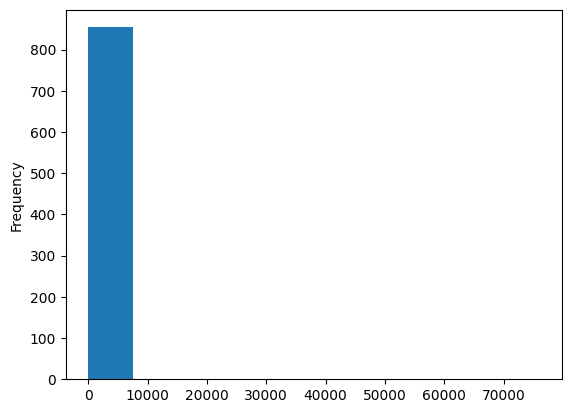

In [18]:
# Busca pela maior incidência de valor (Range entre 0 e 76000)
df['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x <= 76000)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

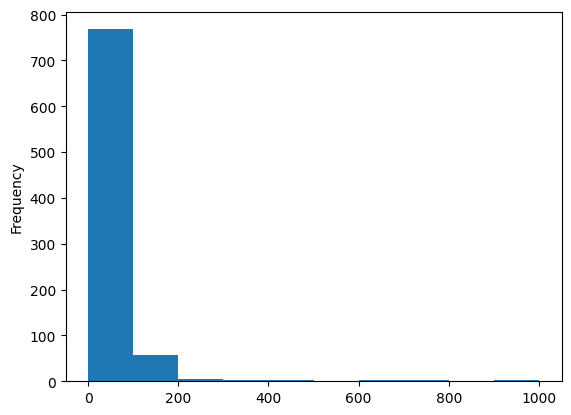

In [19]:
# Busca pela maior incidência de valor(reduzindo o range)
df['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x < 1000)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

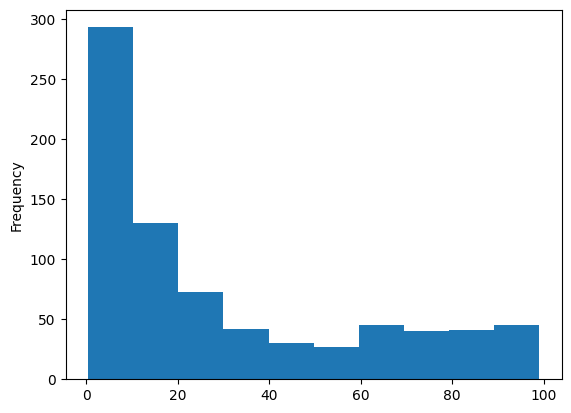

In [20]:
# Busca pela maior incidência de valor(reduzindo o range)
df['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x < 100)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

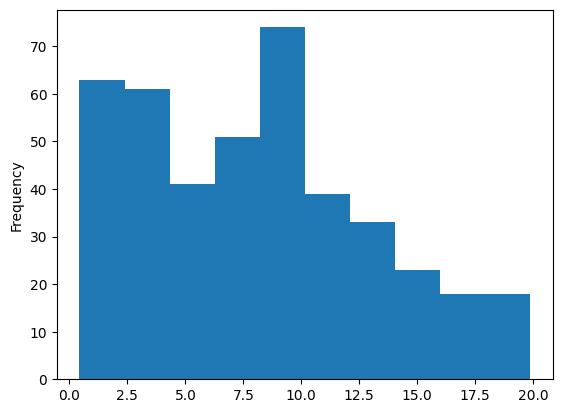

In [21]:
# Busca pela maior incidência de valor(reduzindo o range)
df['COTAÇÃO ATUAL'].loc[lambda x : (x > 0) & (x < 20)].plot.hist()

In [22]:
# Verificar maiores incidências de Dividend Yeld
df['DIVIDEND YIELD'].value_counts()

0.0000        271
0.0205          4
0.0472          3
0.0882          3
0.0594          3
0.0111          3
0.0562          3
0.0239          3
0.0262          3
0.0772          2
0.1284          2
0.0547          2
0.0792          2
0.1090          2
0.0932          2
0.0908          2
0.0958          2
0.0918          2
0.1171          2
0.0268          2
0.1162          2
0.0364          2
0.0001          2
0.0826          2
0.1825          2
0.1275          2
0.0088          2
0.0188          2
0.0879          2
0.0658          2
0.0341          2
0.1024          2
0.0473          2
0.0963          2
0.1101          2
0.1603          2
0.0804          2
0.1370          2
0.1122          2
0.0294          2
0.0652          2
0.1750          2
0.0191          2
0.1703          2
0.0531          2
0.0836          2
0.0487          2
0.0816          2
0.1552          2
0.0959          2
0.0326          2
0.0812          2
0.0295          2
0.0333          2
0.0508          2
0.1411    

In [23]:
# Verificar % de Dividend Yeld == 0 (30.21%)
(271/897)*100

30.211817168338907

<AxesSubplot: ylabel='Frequency'>

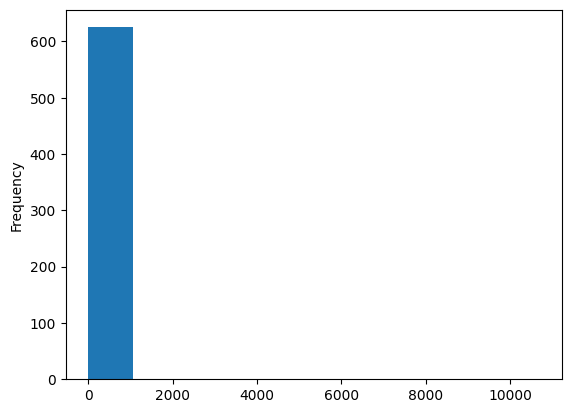

In [24]:
# Localizar as maiores incidências
df['DIVIDEND YIELD'].loc[lambda x : (x > 0) & (x <= 10681)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

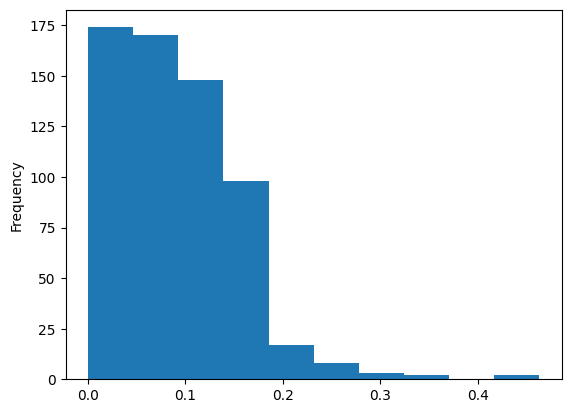

In [25]:
# Localizar as maiores incidências <0.5
df['DIVIDEND YIELD'].loc[lambda x : (x > 0) & (x <= 0.5)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

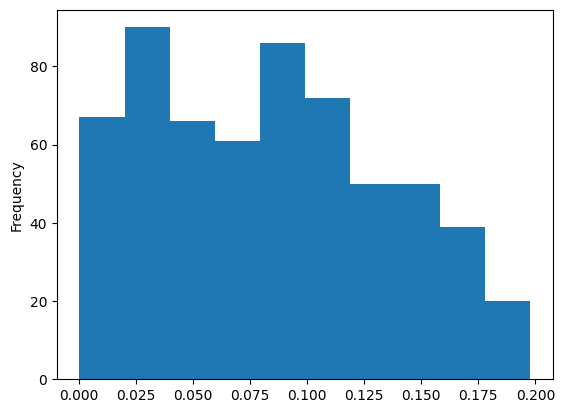

In [26]:
# Localizar as maiores incidências <0.5
df['DIVIDEND YIELD'].loc[lambda x : (x > 0) & (x <= 0.2)].plot.hist()

In [27]:
# Análise da variável CAGR (Temos valores negativos nesse caso)
df['CAGR LUCRO'].value_counts()

 0.1041        7
 0.0147        4
 0.2046        4
 0.2378        3
 0.0853        3
 0.3057        3
-0.3731        3
-0.2356        3
 0.1746        3
 0.4729        3
 0.1919        3
-0.0511        3
 0.5467        3
 0.5455        3
 0.2272        3
 0.3076        3
 0.3253        3
 0.0801        3
-0.1061        3
-0.0285        3
 0.3437        3
 0.3495        3
 0.2528        3
 0.1364        3
 0.6170        3
-0.0249        3
 0.2265        3
 0.1091        3
 0.0673        3
 0.0881        3
 0.2137        2
 0.1062        2
-0.0773        2
 0.1268        2
 0.1898        2
 0.4415        2
 0.0978        2
-0.5898        2
 0.1811        2
 20159.0000    2
 0.2635        2
 0.0384        2
-0.3666        2
 0.1306        2
 0.0762        2
 0.0577        2
 0.4750        2
 0.3519        2
-0.4756        2
 0.0507        2
 0.1092        2
 0.4642        2
 0.1274        2
 0.2364        2
-0.0005        2
-0.0289        2
 0.3565        2
-0.0303        2
 0.3153       

<AxesSubplot: ylabel='Frequency'>

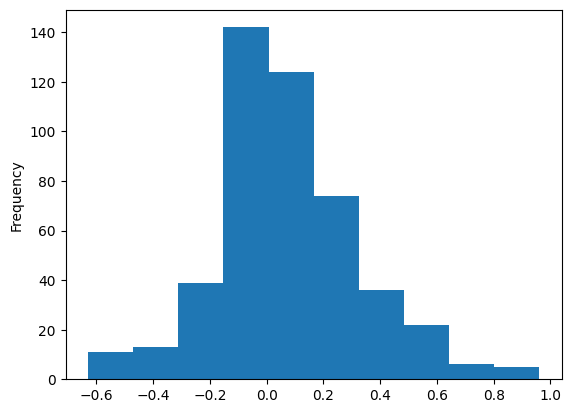

In [28]:
# Localizar as maiores incidências de CAGR 
df['CAGR LUCRO'].loc[lambda x : (x > -1.0) & (x <= 1.0)].plot.hist()

<AxesSubplot: ylabel='Frequency'>

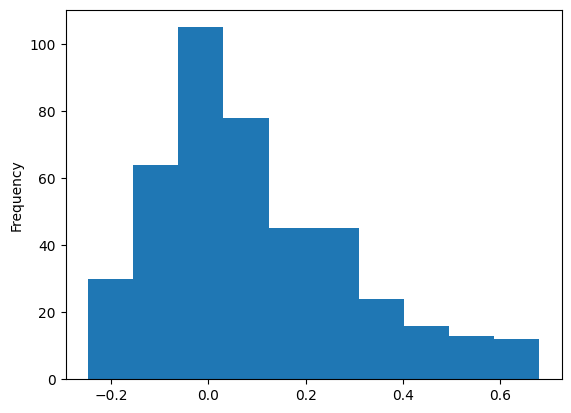

In [29]:
# Zoom na maior concentração de ocorrências de CAGR
df['CAGR LUCRO'].loc[lambda x : (x > -0.25) & (x <= 0.7)].plot.hist()

In [30]:
#Overview dos dados (Atenção para as correlações)
#ProfileReport(df)

In [54]:
cagr_lucro = []
cot_atual = []
liq_dia = []
d_yield = []
lucro = []

acoes_tops = (df['TIPO'] == 'AÇÃO') & (df['CAGR LUCRO'] > 0.01) & (df['COTAÇÃO ATUAL'] < 30) & (df['LIQUIDEZ DIÁRIA'] > 200000) & (df['DIVIDEND YIELD'] > 0.06) & (df['LUCRO'] > 100000000) & (df['P/VP'] < 1.3) & (df['CAIXA'] > 10000000)
acoes_tops = df[acoes_tops]
display(acoes_tops)
        

,CÓDIGO,TIPO,SETOR,COTAÇÃO ATUAL,PREÇO MÍNIMO,PREÇO MÁXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO,INVESTIR
1,ABCB4,AÇÃO,Financeiro e Outros,16.63,14.47,22.29,0.0649,1.247514e+08,0.72,0.1336,5.205386e+09,3.559270e+09,800230000.0,SIM
7,AGRO3,AÇÃO,Consumo não Cíclico,22.65,20.04,31.53,0.1300,1.201784e+07,1.24,0.3906,2.051176e+09,2.051800e+08,520100000.0,NÃO
147,CGRA4,AÇÃO,Consumo Cíclico,29.02,25.00,34.55,0.0828,1.659202e+07,0.67,0.1416,8.323610e+08,2.293100e+08,119070000.0,SIM
181,CSMG3,AÇÃO,Utilidade Pública,17.79,10.47,16.85,0.0792,4.473449e+09,0.85,0.0852,7.254514e+09,1.117320e+09,843360000.0,SIM
231,ENAT3,AÇÃO,"Petróleo, Gás e Biocombustíveis",12.56,10.73,23.85,0.1357,1.753600e+09,0.81,0.0141,4.109821e+09,1.450370e+09,383380000.0,NÃO
252,EUCA3,AÇÃO,Materiais Básicos,11.30,9.24,15.29,0.0740,3.295487e+06,0.45,0.4376,2.012797e+09,1.772200e+08,257490000.0,SIM
253,EUCA4,AÇÃO,Materiais Básicos,9.30,6.07,11.00,0.0878,2.363462e+07,0.41,0.4376,2.012797e+09,1.772200e+08,257490000.0,SIM
400,MYPK3,AÇÃO,Consumo Cíclico,10.85,9.93,17.88,0.0613,2.087882e+09,0.43,11273.0000,4.292807e+09,1.878670e+09,404170000.0,SIM
446,POMO3,AÇÃO,Bens Industriais,3.36,1.82,2.86,0.0818,1.810401e+08,0.85,0.4415,3.204773e+09,4.537000e+07,436800000.0,SIM
447,POMO4,AÇÃO,Bens Industriais,4.25,2.18,3.50,0.0676,2.249013e+09,1.02,0.4415,3.204773e+09,4.537000e+07,436800000.0,SIM


In [55]:
acoes_tops.shape

(13, 14)

In [78]:
fundos_tops = (df['TIPO'] == 'FUNDO') & (df['COTAÇÃO ATUAL'] < 11) & (df['LIQUIDEZ DIÁRIA'] > 1000000) & (df['DIVIDEND YIELD'] > 0.12) & (df['DIVIDEND YIELD'] < 0.25) & (df['P/VP'] < 1.1) & (df['CAIXA'] > 50000000)
fundos_tops = df[fundos_tops]
display(fundos_tops)

,CÓDIGO,TIPO,SETOR,COTAÇÃO ATUAL,PREÇO MÍNIMO,PREÇO MÁXIMO,DIVIDEND YIELD,LIQUIDEZ DIÁRIA,P/VP,CAGR LUCRO,PATRIMÔNIO LÍQUIDO,CAIXA,LUCRO,INVESTIR
604,APTO11,FUNDO,Híbrido,8.76,8.10,10.50,0.1571,6073841.0,0.82,NaN,4.010624e+07,3.959817e+08,0.0,SIM
605,ARRI11,FUNDO,Títulos e Val. Mob.,8.40,8.06,9.87,0.1795,36149832.0,0.91,0.0029,1.160569e+08,1.104690e+09,0.0,NÃO
618,BIME11,FUNDO,Títulos e Val. Mob.,6.98,6.57,9.82,0.1818,7937585.0,0.76,NaN,5.231628e+07,1.003653e+08,0.0,SIM
662,CYCR11,FUNDO,Títulos e Val. Mob.,8.36,7.88,10.50,0.1603,35618021.0,0.84,NaN,1.568444e+08,1.395798e+09,0.0,SIM
679,FGAA11,FUNDO,Fiagro,9.55,9.61,11.50,0.1811,103168744.0,1.01,NaN,3.272987e+08,7.161222e+08,0.0,SIM
692,GAME11,FUNDO,Híbrido,8.50,8.20,10.34,0.1659,9019376.0,0.83,NaN,2.162445e+08,3.517574e+08,0.0,SIM
759,RURA11,FUNDO,Fiagro,10.10,9.93,10.75,0.1248,124318153.0,1.02,NaN,9.821555e+08,1.151093e+10,0.0,SIM
761,RZAG11,FUNDO,Títulos e Val. Mob.,9.18,8.90,10.57,0.1687,227957329.0,0.93,NaN,6.516478e+08,4.268517e+08,0.0,SIM
785,VCRI11,FUNDO,Títulos e Val. Mob.,7.98,7.85,10.04,0.1552,34615982.0,0.84,NaN,1.693616e+08,1.035837e+09,0.0,SIM
787,VGHF11,FUNDO,Títulos e Val. Mob.,9.16,8.65,10.19,0.1482,219236897.0,0.97,NaN,6.669118e+08,5.801316e+08,0.0,SIM


In [79]:
fundos_tops.shape

(16, 14)

In [32]:
df1 = pd.DataFrame(zip(cagr_lucro, cot_atual, liq_dia, d_yield, lucro), columns=['CAGR LUCRO', 'COTAÇÃO ATUAL', 'LIQUIDEZ DIÁRIA', 'DIVIDEND YIELD', 'LUCRO'])
display(df1)

,CAGR LUCRO,COTAÇÃO ATUAL,LIQUIDEZ DIÁRIA,DIVIDEND YIELD,LUCRO


In [33]:
#print("Q1:",np.quantile(idade_vetor, q=0.25))

In [34]:
#print("Q2:",np.quantile(idade_vetor, q=0.5))

In [35]:
#print("Q3:",np.quantile(idade_vetor, q=0.75))

In [36]:
#print("Q4:",np.quantile(idade_vetor, q=1))